In [3]:
import os
from google.colab import drive
GDRIVE_PATH = '/content/gdrive'
THIS_EXERCISE_PATH = os.path.join(GDRIVE_PATH, "My Drive", "CreditCardGan")
MODELS_HOME = os.path.join(THIS_EXERCISE_PATH, "models")
drive.mount(GDRIVE_PATH)

ModuleNotFoundError: No module named 'google.colab'

In [22]:
import os
THIS_EXERCISE_PATH = "."
MODELS_HOME = os.path.join(THIS_EXERCISE_PATH, "models")

In [23]:
os.makedirs(THIS_EXERCISE_PATH, exist_ok=True)
os.makedirs(MODELS_HOME, exist_ok=True)

In [24]:
import pandas as pd
data = pd.read_csv('https://query.data.world/s/zruvk5e5icrymfmrwrihhzbuaha37h')

In [25]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.898849e-15,5.299481e-16,-8.879061e-15,2.770162e-15,-1.651521e-15,2.092601e-15,-1.670332e-15,-2.157434e-16,-3.138343e-15,...,1.404690e-16,7.680294e-16,5.341636e-16,4.465717e-15,1.553218e-15,1.653847e-15,-3.639274e-16,-1.183642e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
import pickle

In [27]:
data.keys()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [28]:
FEATURES = len(data.keys())
LATENT_DIM = FEATURES
FEATURES

31

In [29]:
from sklearn.preprocessing import QuantileTransformer

transformator = QuantileTransformer(output_distribution='normal')
data_transformed = np.array(transformator.fit_transform(data), dtype='float')
train, test = train_test_split(data_transformed, test_size=0.5, random_state=42)

In [30]:
data_transformed.shape

(284807, 31)

In [31]:
with open(os.path.join(MODELS_HOME, 'transformer'), 'wb') as file:
    pickle.dump(transformator, file)

In [32]:
GENERATOR_FILE = os.path.join(MODELS_HOME, 'generator.pt')
DISCRIMINATOR_FILE = os.path.join(MODELS_HOME, 'discriminator.pt')
try:
  gen = torch.load(GENERATOR_FILE)
  disc = torch.load(DISCRIMINATOR_FILE)
except FileNotFoundError:
  print("building new models")
  gen = nn.Sequential(nn.Linear(FEATURES, FEATURES), nn.ReLU(),
                    nn.Linear(FEATURES, FEATURES // 2), nn.ReLU(),
                    nn.Linear(FEATURES // 2, FEATURES), nn.ReLU(),
                    nn.Linear(FEATURES, FEATURES)).cuda()

  disc = nn.Sequential(nn.Linear(FEATURES, FEATURES), nn.ReLU(),
                    nn.Linear(FEATURES, FEATURES // 2), nn.ReLU(),
                    nn.Linear(FEATURES // 2, FEATURES), nn.ReLU(),
                    nn.Linear(FEATURES, 1)).cuda()

In [33]:
gen_opt = torch.optim.Adam(gen.parameters(), lr=1e-4)
#gen_scheduler = torch.optim.lr_scheduler.MultiStepLR(gen_opt, milestones=[10000, 30000], gamma=0.1)

disc_opt = torch.optim.Adam(disc.parameters(), lr=1e-4)
#disc_scheduler = torch.optim.lr_scheduler.MultiStepLR(disc_opt, milestones=[10000, 30000], gamma=0.1)

In [49]:
TRAIN_BATCH_SIZE = 64
def sample_real_data(batch_size):
  while True:
    dataloader = torch.utils.data.DataLoader(train, batch_size=batch_size,
                                             shuffle=True, drop_last=True)
    for batch in dataloader:
      yield batch
real_data_batches = sample_real_data(TRAIN_BATCH_SIZE)

In [50]:
def sample_gen_data(batch_size):
  noise = torch.randn(batch_size, LATENT_DIM, device="cuda")
  return gen(noise)

In [51]:
# https://github.com/caogang/wgan-gp/blob/master/gan_mnist.py
def calc_gradient_penalty_classic(critic:torch.nn.Module,
                                  real_data:torch.Tensor,
                                  fake_data:torch.Tensor):
  """
  Computes Gradient Penalty in random interpolates, in its classic form:
  (|∇(D(x)|^2 - 1)^2, x is interpolated between a real and a generated sample
  Args:
    critic: a torch model whose gradient needs to be penalised
    real_data[batch_size, n_features]: a sample of real data
    fakse_data[batch_size, n_features]: a sample of fake data
  Returns:
    torch.Tensor, scalar, gradient penalty evalute
  """
  assert real_data.shape == fake_data.shape
  alpha = torch.rand(real_data.shape[0], 1)
  alpha = alpha.expand(real_data.size()).cuda()

  interpolates = (alpha * real_data + ((1 - alpha) * fake_data)).cuda()
  interpolates = torch.autograd.Variable(interpolates, requires_grad=True)

  disc_interpolates = critic(interpolates)

  gradients = torch.autograd.grad(
      outputs=disc_interpolates, inputs=interpolates,
      grad_outputs=torch.ones(disc_interpolates.size(), device="cuda"),
      create_graph=True, retain_graph=True, only_inputs=True)[0]

  gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
  return gradient_penalty

In [67]:
LAMBDA = 1.
def train_disc():
    """
    Trains the discriminator for one step. Please note
    this is not a pure function, it captutes the majority of variables
    from the context.
    """
    real_data = next(real_data_batches).to("cuda").float()
    gen_data = sample_gen_data(TRAIN_BATCH_SIZE)
    
    disc_loss = -logsigmoid(disc(
              real_data
          )).mean() - \
          logsigmoid(-disc(
              gen_data
          )).mean()
    
    disc_opt.zero_grad()
    disc_loss.backward()
    disc_opt.step()
    return disc_loss

In [68]:
def train_gen():
    """Trains generator for one step"""
    gen_data = sample_gen_data(TRAIN_BATCH_SIZE)
    
    gen_loss = -logsigmoid(disc(
              gen_data
          )).mean()    
    gen_opt.zero_grad()
    gen_loss.backward()
    gen_opt.step()
    return gen_loss

In [69]:
import os
from torch.utils.tensorboard import SummaryWriter
TENSORBOARD_LOGDIR = "./logs"
MODEL_NAME = "cardv5"
summary_writer = SummaryWriter(log_dir=os.path.join(TENSORBOARD_LOGDIR, MODEL_NAME))

In [70]:
%reload_ext tensorboard

In [71]:
%tensorboard --logdir ./logs

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/usr/lib/python3.6/imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "/usr/lib/python3.6/imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: libcublas.so.9.0: cannot open shared object file: No such file or directory

During handling of the above exception, another exce

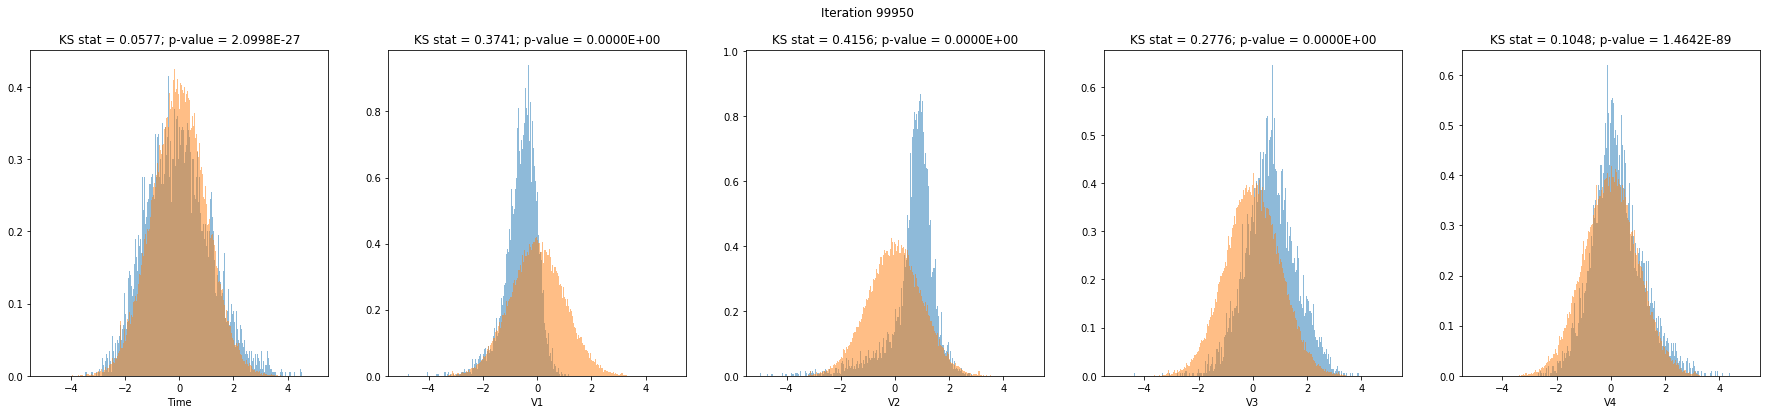

In [75]:
from torch.nn.functional import logsigmoid
DISCRIMINATOR_ITERATIONS_PER_GENEREATOR = 5
VALIDATION_INTERVAL = 50
SAVE_INTERVAL = 50
HIST_BINS=500
DATA_HIST_RANGE=[-5, 5]

validation_data = torch.from_numpy(test).cuda()
validation_data_np = test

for i in range(100000):
    #gen_scheduler.step()
    #disc_scheduler.step()
    for _ in range(DISCRIMINATOR_ITERATIONS_PER_GENEREATOR):
        disc_loss_this_iter = train_disc()
    
    gen_loss_this_iter = train_gen()

    summary_writer.add_scalar("discriminator loss", disc_loss_this_iter,
                              global_step=i)
    summary_writer.add_scalar("generator loss", gen_loss_this_iter,
                              global_step=i)

    if i % SAVE_INTERVAL == 0:
        torch.save(gen, GENERATOR_FILE)
        torch.save(disc, DISCRIMINATOR_FILE)

    if i % VALIDATION_INTERVAL == 0:
        clear_output(True)        
        validation_generated = sample_gen_data(10000)
        validation_generated_np = validation_generated.data.cpu().numpy()
        
        fig, axes_list = plt.subplots(ncols=5, figsize=[FEATURES, 6])
        for index, ax in enumerate(axes_list):
          ax.hist(validation_generated_np[:, index], range=DATA_HIST_RANGE,
                  alpha=0.5, density=True, label='Generated', bins=HIST_BINS)
          ax.hist(validation_data_np[:, index], range=DATA_HIST_RANGE,
                  alpha=0.5, density=True, label='Real', bins=HIST_BINS)
          ax.set_xlabel(data.columns[index])
          ks_result = ks_2samp(validation_generated_np[:, index],
                                    validation_data_np[:, index])
          ax.set_title("KS stat = {:.4f}; p-value = {:.4E}".format(*tuple(ks_result)))
        fig.suptitle("Iteration {}".format(i))
        plt.show()

In [ ]:
gen = torch.load(GENERATOR_FILE)
disc = torch.load(DISCRIMINATOR_FILE)